In [6]:
#Libraries
#EDA : Exploratory Data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline 

In [7]:
df_raw = pd.read_csv(
    r"C:\ML\tripadvisor_review (1).csv",
    index_col="User ID"
)

df_raw.columns = [
    "art_galleries", "dance_clubs", "juice_bars",
    "restaurants", "museum", "resorts", "parks",
    "beaches", "theaters", "religious_institutes"
]

df_raw.head()


,art_galleries,dance_clubs,juice_bars,restaurants,museum,resorts,parks,beaches,theaters,religious_institutes
User ID,,,,,,,,,,
User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


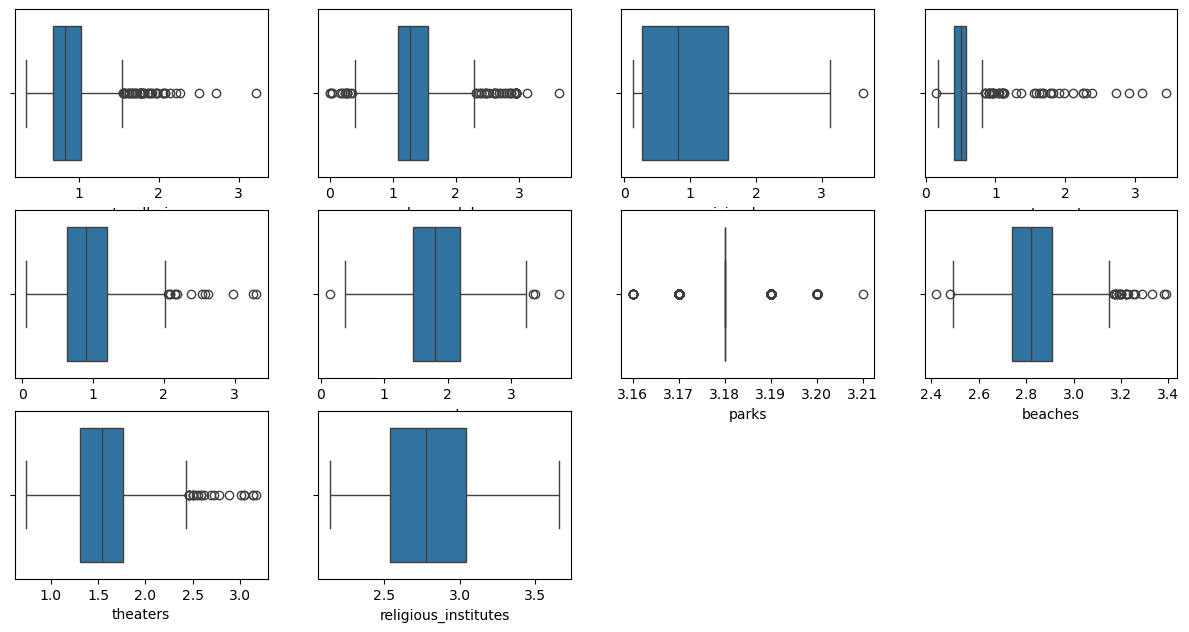

In [33]:
plt.figure(figsize=(15, 10))
for i,j in enumerate(df_raw.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df_raw[j])

plt.show()

In [11]:
df_raw.describe()

,art_galleries,dance_clubs,juice_bars,restaurants,museum,resorts,parks,beaches,theaters,religious_institutes
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


<Axes: >

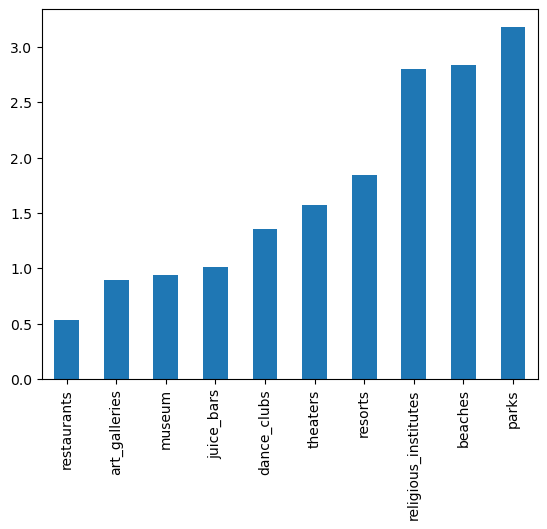

In [12]:
df_raw.mean().sort_values(ascending=True).plot.bar()

In [15]:
df_raw.describe().T['mean']

art_galleries           0.893194
dance_clubs             1.352612
juice_bars              1.013306
restaurants             0.532500
museum                  0.939735
resorts                 1.842898
parks                   3.180939
beaches                 2.835061
theaters                1.569439
religious_institutes    2.799224
Name: mean, dtype: float64

<Axes: >

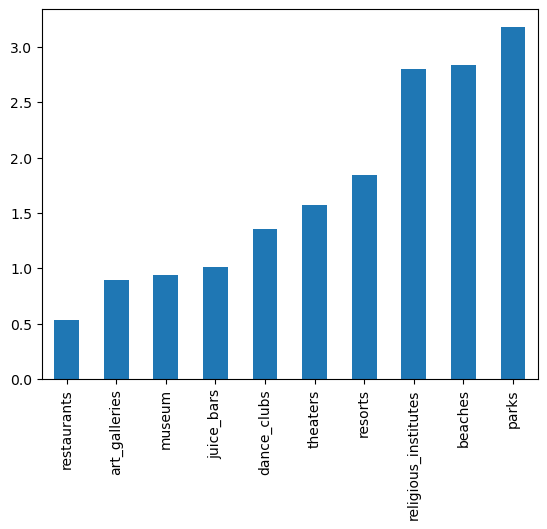

In [16]:
df_raw.mean().sort_values(ascending=True).plot.bar()

<Axes: >

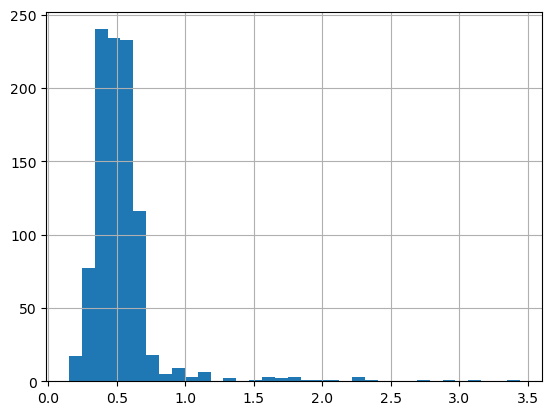

In [18]:
df_raw.restaurants.hist(bins=35)

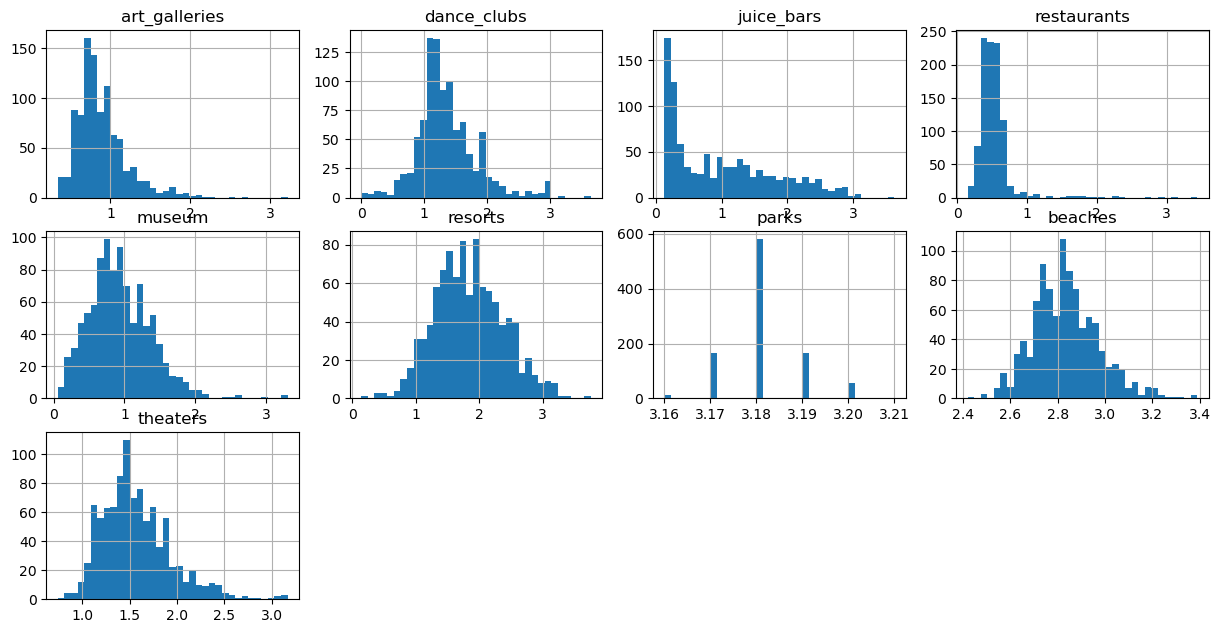

In [22]:
plt.figure(figsize=(15,10))
for i,j in enumerate(df_raw.columns[:-1]):
    plt.subplot(4,4,i+1)
    plt.title(j)
    df_raw[j].hist(bins=35)

plt.show()

In [24]:
df_raw.head()

,art_galleries,dance_clubs,juice_bars,restaurants,museum,resorts,parks,beaches,theaters,religious_institutes
User ID,,,,,,,,,,
User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [23]:
df_raw.mean(axis=1).sort_values(ascending=False)

User ID
User 667    2.225
User 248    2.225
User 537    2.155
User 796    2.130
User 813    2.119
            ...  
User 190    1.389
User 542    1.383
User 324    1.341
User 385    1.305
User 979    1.213
Length: 980, dtype: float64

<Axes: >

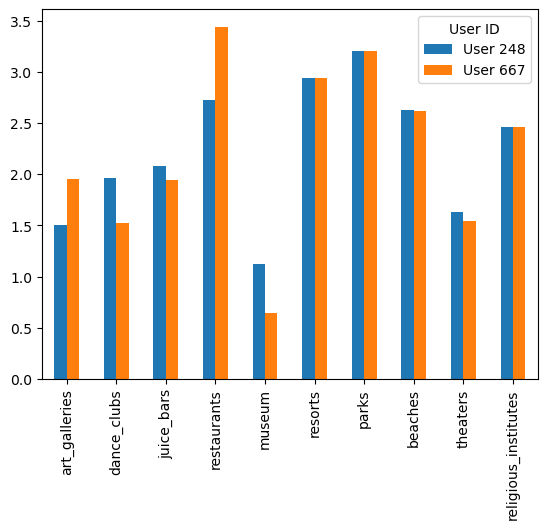

In [25]:
df_raw[df_raw.index.isin(['User 667','User 248'])].T.plot.bar()

In [26]:
from sklearn.preprocessing import StandardScaler
#StandardScaler rescales a dataset to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw)
df_scaled

array([[ 0.11264465,  0.93588703,  1.6197497 , ..., -0.32787224,
         0.68751758, -1.18059095],
       [ 0.38808847,  1.77264397,  2.08917107, ..., -1.49205628,
         0.797274  , -1.49190812],
       [ 1.00018585, -1.15600533, -0.60048651, ..., -0.25511074,
        -0.71187679, -0.93153721],
       ...,
       [-0.86671115, -0.06822131, -0.43555468, ..., -0.18234924,
        -0.62955947,  0.68731207],
       [ 0.11264465, -2.41114075, -1.12065614, ...,  1.05459631,
        -1.23321978, -1.05606408],
       [ 0.11264465, -1.6580595 ,  0.14805027, ...,  0.25421978,
        -0.62955947, -1.24285439]])

In [27]:
df_scaled = pd.DataFrame(df_scaled,columns=df_raw.columns)
df_scaled.head()

,art_galleries,dance_clubs,juice_bars,restaurants,museum,resorts,parks,beaches,theaters,religious_institutes
0,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
1,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
2,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
3,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
4,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010


In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(df_scaled)

KMeans(n_clusters=3)

In [31]:
df_scaled['Clusters']=km.predict(df_scaled)
df_scaled.head()

,art_galleries,dance_clubs,juice_bars,restaurants,museum,resorts,parks,beaches,theaters,religious_institutes,Clusters
0,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591,1
1,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908,1
2,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537,2
3,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205,0
4,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010,1


In [39]:
df_scaled['Clusters'].value_counts()

Clusters
0    338
1    337
2    305
Name: count, dtype: int64

<Axes: xlabel='Clusters', ylabel='count'>

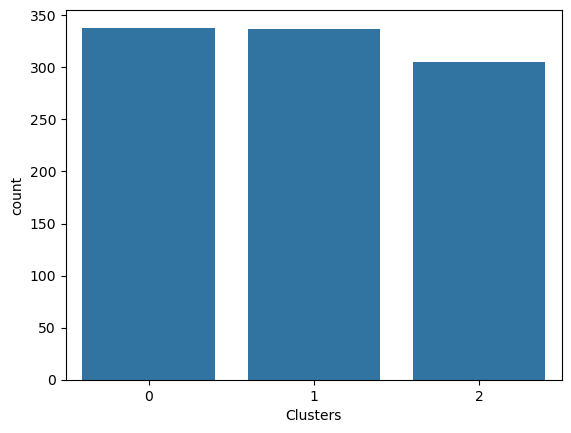

In [44]:
sns.countplot(x=df_scaled['Clusters'])

In [45]:
from sklearn.decomposition import PCA 
import numpy as np 
pca = PCA(2)

#Transform the data 
df = pca.fit_transform(df_raw)

df.shape

(980, 2)

In [48]:
df_final=pd.DataFrame(df,columns=['Plane-I','Plane-II'])
df_final['label']=df_scaled['Clusters'].tolist() #clustering.labels_
df_final.head()

,Plane-I,Plane-II,label
0,1.391408,-0.063253,1
1,2.225649,0.660561,1
2,-0.677268,-0.512645,2
3,-0.849739,0.132922,0
4,0.420059,0.202708,1


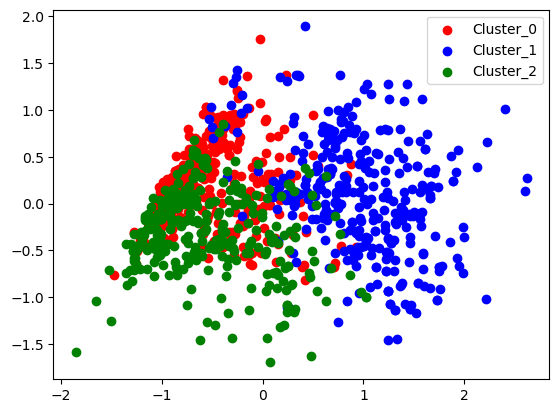

In [56]:
# filter rows by label
filtered_label0 = df_final[df_final['label'] == 0]
filtered_label1 = df_final[df_final['label'] == 1]
filtered_label2 = df_final[df_final['label'] == 2]

# Plotting the results
plt.scatter(filtered_label0['Plane-I'], filtered_label0['Plane-II'], color='red')
plt.scatter(filtered_label1['Plane-I'], filtered_label1['Plane-II'], color='blue')
plt.scatter(filtered_label2['Plane-I'], filtered_label2['Plane-II'], color='green')

plt.legend(['Cluster_0', 'Cluster_1', 'Cluster_2'])
plt.show()


In [57]:
from sklearn.cluster import KMeans

In [59]:
distance=[]
for i in range(2,20):
    km=KMeans(n_clusters=i)
    km.fit(df_raw)
    distance.append(km.inertia_)

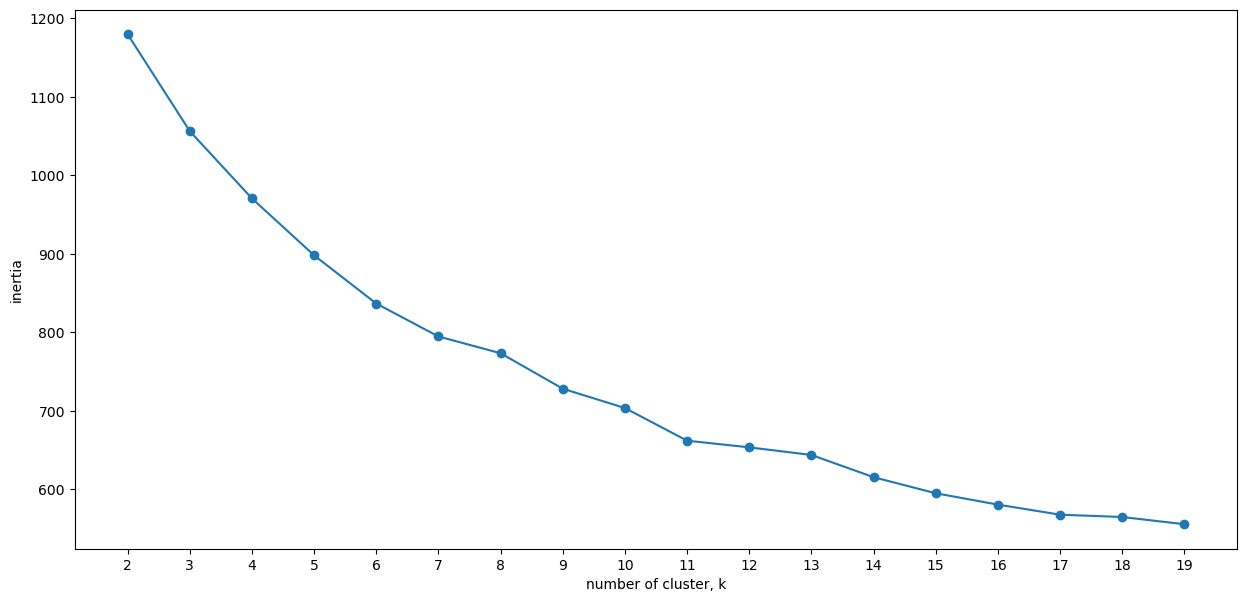

In [60]:
ks = range(2,20)
plt.figure(figsize=(15,7))
plt.plot(ks, distance, '-o')
plt.xlabel('number of cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [63]:
from sklearn.cluster import DBSCAN
df_train = df_raw.copy()   # or df_final, depending on your workflow

dbscan = DBSCAN(eps=0.6, min_samples=3)
dbscan.fit(df_train)


DBSCAN(eps=0.6, min_samples=3)

In [72]:
clusters = dbscan.labels_

In [71]:
len(set(clusters))

9

In [73]:
from sklearn.metrics import silhouette_score
silhouette_score(df_raw,clusters)

-0.17231702464352092

In [75]:
eps = [0.6,0.8,1]
min_samples = [2,3,4]

In [79]:
for i in eps:
    for j in min_samples:
        print("for eps {0} and min_samples {1}".format(i,j))
        dbscan = DBSCAN(eps=i,min_samples=j)
        dbscan.fit(df_raw)
        clusters = dbscan.labels_
        print("Clusters",len(set(clusters)))
        print("Silhouette Score", silhouette_score(df_raw,clusters))
        print("-------")

for eps 0.6 and min_samples 2
Clusters 22
Silhouette Score -0.23430923012354446
-------
for eps 0.6 and min_samples 3
Clusters 9
Silhouette Score -0.17231702464352092
-------
for eps 0.6 and min_samples 4
Clusters 4
Silhouette Score -0.10383248054659072
-------
for eps 0.8 and min_samples 2
Clusters 7
Silhouette Score 0.04067961809560737
-------
for eps 0.8 and min_samples 3
Clusters 4
Silhouette Score 0.2250545641442676
-------
for eps 0.8 and min_samples 4
Clusters 4
Silhouette Score 0.17779815923280345
-------
for eps 1 and min_samples 2
Clusters 5
Silhouette Score 0.2088011649161973
-------
for eps 1 and min_samples 3
Clusters 5
Silhouette Score 0.2088011649161973
-------
for eps 1 and min_samples 4
Clusters 2
Silhouette Score 0.3387970749425855
-------


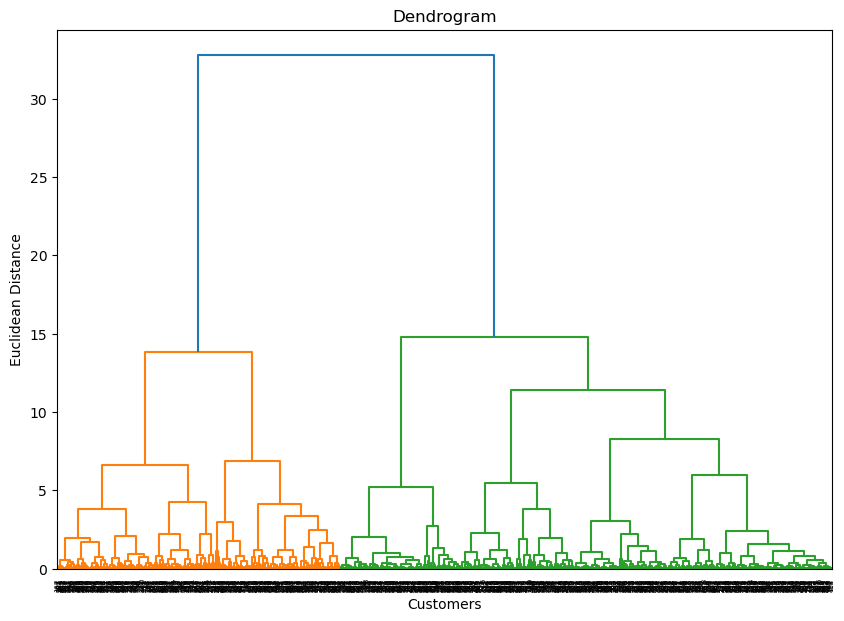

In [84]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Sample 1000 rows
idx = np.random.choice(df.shape[0], size=980, replace=False)
sampled_data = df[idx]

dendrogram = sch.dendrogram(
    sch.linkage(sampled_data, method="ward")
)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()
